Tutorial from: https://medium.com/@prajjwalchauhan94017/stock-prediction-and-forecasting-using-lstm-long-short-term-memory-9ff56625de73


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error

/Users/andyisworking/Documents/DataEngineeringBootcamp_DataScientest/crypto_bot/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
df = pd.read_json("../../sample_data/LINKUSDT_1d.json")
df

,open time,open,high,low,close,volume,close time,quote asset volume,number of trades,taker buy base asset volume,taker buy quote asset volume,delete
0,1547596800000,0.5355,0.5355,0.4668,0.4895,1343660.31,1547683199999,6.650136e+05,3492,602419.92,3.001164e+05,0
1,1547683200000,0.4895,0.4953,0.4639,0.4756,1411725.35,1547769599999,6.734472e+05,3987,778386.36,3.708751e+05,0
2,1547769600000,0.4762,0.5112,0.4601,0.4894,984417.59,1547855999999,4.749993e+05,5662,463067.14,2.234760e+05,0
3,1547856000000,0.4908,0.5000,0.4673,0.4831,735443.20,1547942399999,3.540900e+05,4482,335579.52,1.621085e+05,0
4,1547942400000,0.4803,0.4920,0.4590,0.4834,677499.56,1548028799999,3.233336e+05,2098,315527.36,1.507622e+05,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2112,1730073600000,10.9900,11.2700,10.7100,11.1800,2232645.81,1730159999999,2.452865e+07,140222,1067166.98,1.173026e+07,0
2113,1730160000000,11.1900,11.8100,11.1500,11.8000,2413413.41,1730246399999,2.781243e+07,141198,1179830.64,1.359220e+07,0
2114,1730246400000,11.8000,12.4500,11.6500,12.3900,3115047.04,1730332799999,3.767751e+07,179362,1691645.36,2.046836e+07,0
2115,1730332800000,12.4000,12.4700,11.3100,11.4100,2672404.77,1730419199999,3.185358e+07,165377,1260534.45,1.503742e+07,0


In [4]:
df["Date"] = pd.to_datetime(df["open time"],unit='ms')
df.index = df["Date"]
df

,open time,open,high,low,close,volume,close time,quote asset volume,number of trades,taker buy base asset volume,taker buy quote asset volume,delete,Date
Date,,,,,,,,,,,,,
2019-01-16,1547596800000,0.5355,0.5355,0.4668,0.4895,1343660.31,1547683199999,6.650136e+05,3492,602419.92,3.001164e+05,0,2019-01-16
2019-01-17,1547683200000,0.4895,0.4953,0.4639,0.4756,1411725.35,1547769599999,6.734472e+05,3987,778386.36,3.708751e+05,0,2019-01-17
2019-01-18,1547769600000,0.4762,0.5112,0.4601,0.4894,984417.59,1547855999999,4.749993e+05,5662,463067.14,2.234760e+05,0,2019-01-18
2019-01-19,1547856000000,0.4908,0.5000,0.4673,0.4831,735443.20,1547942399999,3.540900e+05,4482,335579.52,1.621085e+05,0,2019-01-19
2019-01-20,1547942400000,0.4803,0.4920,0.4590,0.4834,677499.56,1548028799999,3.233336e+05,2098,315527.36,1.507622e+05,0,2019-01-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-28,1730073600000,10.9900,11.2700,10.7100,11.1800,2232645.81,1730159999999,2.452865e+07,140222,1067166.98,1.173026e+07,0,2024-10-28
2024-10-29,1730160000000,11.1900,11.8100,11.1500,11.8000,2413413.41,1730246399999,2.781243e+07,141198,1179830.64,1.359220e+07,0,2024-10-29
2024-10-30,1730246400000,11.8000,12.4500,11.6500,12.3900,3115047.04,1730332799999,3.767751e+07,179362,1691645.36,2.046836e+07,0,2024-10-30


In [5]:
df.drop(columns=['open time', 'close time', 'delete', 'Date'], inplace=True)
df

,open,high,low,close,volume,quote asset volume,number of trades,taker buy base asset volume,taker buy quote asset volume
Date,,,,,,,,,
2019-01-16,0.5355,0.5355,0.4668,0.4895,1343660.31,6.650136e+05,3492,602419.92,3.001164e+05
2019-01-17,0.4895,0.4953,0.4639,0.4756,1411725.35,6.734472e+05,3987,778386.36,3.708751e+05
2019-01-18,0.4762,0.5112,0.4601,0.4894,984417.59,4.749993e+05,5662,463067.14,2.234760e+05
2019-01-19,0.4908,0.5000,0.4673,0.4831,735443.20,3.540900e+05,4482,335579.52,1.621085e+05
2019-01-20,0.4803,0.4920,0.4590,0.4834,677499.56,3.233336e+05,2098,315527.36,1.507622e+05
...,...,...,...,...,...,...,...,...,...
2024-10-28,10.9900,11.2700,10.7100,11.1800,2232645.81,2.452865e+07,140222,1067166.98,1.173026e+07
2024-10-29,11.1900,11.8100,11.1500,11.8000,2413413.41,2.781243e+07,141198,1179830.64,1.359220e+07
2024-10-30,11.8000,12.4500,11.6500,12.3900,3115047.04,3.767751e+07,179362,1691645.36,2.046836e+07


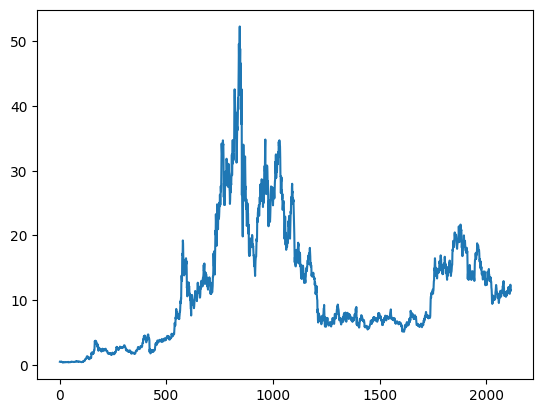

In [6]:
df2 = df.reset_index()['close']
plt.plot(df2)

In [7]:
scaler = MinMaxScaler()
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))
df2.shape

(2117, 1)

In [8]:
train_size = int(len(df2)*0.65)
test_size = len(df2) - train_size
train_data,test_data = df2[0:train_size,:],df2[train_size:len(df2),:1]

In [9]:
def create_dataset(dataset, time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
                   a = dataset[i:(i+time_step),0]
                   dataX.append(a)
                   dataY.append(dataset[i + time_step,0])
    return np.array(dataX),np.array(dataY)

In [10]:
# calling the create dataset function to split the data into 
# input output datasets with time step 100
time_step = 100
X_train,Y_train =  create_dataset(train_data,time_step)
X_test,Y_test =  create_dataset(test_data,time_step)

In [11]:
# checking values
print(X_train.shape)
print(X_train)
print(X_test.shape)
print(Y_test.shape)

(1275, 100)
[[0.00204873 0.00178083 0.0020468  ... 0.00178083 0.00176927 0.00129322]
 [0.00178083 0.0020468  0.00192538 ... 0.00176927 0.00129322 0.00112555]
 [0.0020468  0.00192538 0.00193116 ... 0.00129322 0.00112555 0.00115253]
 ...
 [0.10902405 0.10709674 0.11162592 ... 0.13086047 0.1338478  0.1299739 ]
 [0.10709674 0.11162592 0.11355323 ... 0.1338478  0.1299739  0.12313196]
 [0.11162592 0.11355323 0.11451688 ... 0.1299739  0.12313196 0.12091555]]
(640, 100)
(640,)


In [12]:
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape = (X_train.shape[1],1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')

2024-12-05 15:39:37.067666: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-12-05 15:39:37.067710: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-12-05 15:39:37.067751: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-12-05 15:39:37.067812: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-05 15:39:37.067835: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/andyisworking/Documents/DataEngineeringBootcamp_DataScientest/crypto_bot/.venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shap

In [13]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.fit(X_train,Y_train,validation_data = (X_test,Y_test),epochs = 100,batch_size = 64,verbose = 1)


Epoch 1/100


2024-12-05 15:40:15.200700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 0.0397 - val_loss: 0.0015
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0047 - val_loss: 9.6120e-04
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0039 - val_loss: 6.1880e-04
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0028 - val_loss: 5.9418e-04
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0026 - val_loss: 6.2954e-04
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0027 - val_loss: 9.3799e-04
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0022 - val_loss: 9.3882e-04
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0024 - val_loss: 5.3006e-04
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0025 - val_loss: 6.7519e-04
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0025 - val_loss: 4.4613e-04
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0023 - val_loss: 5.7981e-04
Epoch 12/100
20/20 ━━━━━

In [16]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [17]:
# transform to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [18]:
print(math.sqrt(mean_squared_error(Y_train,train_predict)))
print(math.sqrt(mean_squared_error(Y_test,test_predict)))

16.15724120232376
11.897888250100053


In [19]:
look_back = 100


In [20]:
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back : len(train_predict)+look_back,:] = train_predict

In [21]:
testPredictPlot = np.empty_like(df2)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back)*2 + 1 : len(df2) - 1,:] = test_predict

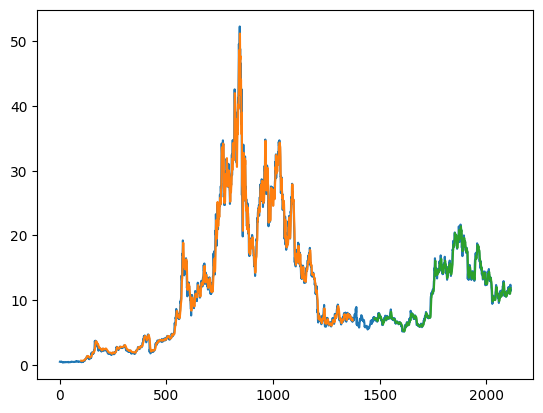

In [22]:
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()